# CNN CIFAR-10 MODEL

## IMPORT ALL LIBRARIES

In [31]:
# Data manupulation
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

#EVALUATION
from sklearn.metrics import classification_report, confusion_matrix


## Load the dataset from tensorflow

In [6]:

from tensorflow.keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


## RESHAPING THE DATA

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [14]:
y_train[0]

array([6], dtype=uint8)

In [10]:
#plt.imshow(x_train[22])

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_train[0].shape

(32, 32, 3)

## BUILD THE MODEL

In [ ]:
# BUILD THE MODEL

In [15]:
# Initiate a model
model = Sequential()

# Add Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
#Add Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Add Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), 
                 input_shape=(32,32,3), activation='relu'))
#Add Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Add Flatten
model.add(Flatten())

#Add Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(loss='categorical_crossentropy',optimizer = 'adam', 
              metrics = ['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
# Initiate an early stoppage
early_stop = EarlyStopping(monitor='val_loss', patience=2)


In [20]:
#Fit the model
model.fit(x_train, y_cat_train, epochs=15, 
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 13s 4ms/step - loss: 1.7043 - accuracy: 0.3785 - val_loss: 1.2739 - val_accuracy: 0.5484
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2118 - accuracy: 0.5698 - val_loss: 1.1082 - val_accuracy: 0.6089
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0335 - accuracy: 0.6369 - val_loss: 1.0335 - val_accuracy: 0.6389
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9092 - accuracy: 0.6820 - val_loss: 0.9769 - val_accuracy: 0.6653
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8080 - accuracy: 0.7176 - val_loss: 0.9769 - val_accuracy: 0.6665
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7307 - accuracy: 0.7445 - val_loss: 0.9524 - val_accuracy: 0.6770
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6556 - accuracy: 0.7693 - val_loss: 0.9613 - val_accuracy

In [24]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.499114,0.45910,1.273875,0.5484
1,1.178721,0.58480,1.108220,0.6089
2,1.018491,0.64322,1.033492,0.6389
3,0.905079,0.68496,0.976888,0.6653
4,0.813687,0.71658,0.976902,0.6665
5,0.736296,0.74310,0.952401,0.6770
6,0.671442,0.76552,0.961272,0.6805
7,0.602806,0.78992,1.000823,0.6749


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe6dcffc780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe6dc7f5208>)

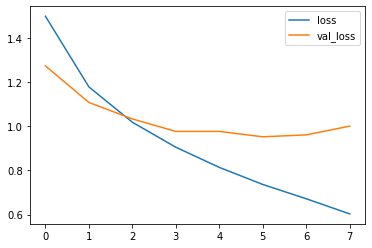

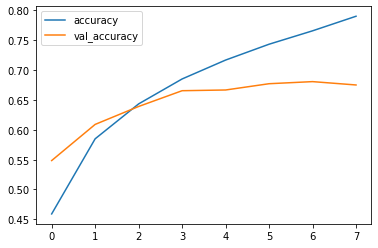

In [28]:
metrics[['loss', 'val_loss']].plot(), metrics[['accuracy','val_accuracy']].plot()

In [29]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0008 - accuracy: 0.6749


[1.0008231401443481, 0.6748999953269958]

In [32]:
#PREDICTIONS
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.67      0.88      0.76      1000
           2       0.57      0.56      0.56      1000
           3       0.51      0.50      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.60      0.54      0.57      1000
           6       0.70      0.81      0.75      1000
           7       0.75      0.70      0.73      1000
           8       0.83      0.73      0.77      1000
           9       0.74      0.72      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [36]:
print(confusion_matrix(y_test, predictions))

[[726  56  54  12  19   5  16   7  53  52]
 [ 16 875   4  15   1   5   9   0  11  64]
 [ 81  22 555  55  68  62  93  36  16  12]
 [ 15  24  86 501  73 161  68  37  18  17]
 [ 23  12  86  67 606  35  84  63  17   7]
 [ 16  20  63 198  43 536  37  65   8  14]
 [  7  28  47  52  16  22 805   5   6  12]
 [ 29  20  43  50  56  53  19 699   4  27]
 [ 74  85  22  17  10   6   8   2 728  48]
 [ 29 172  14  17   7   6   7  12  18 718]]


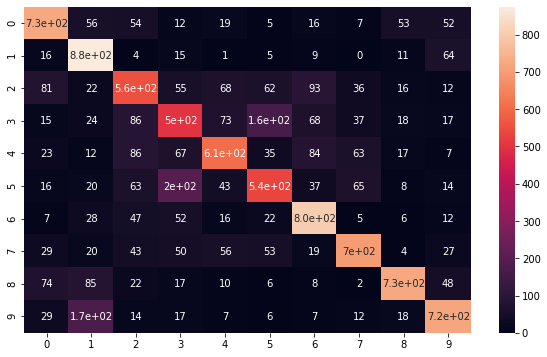

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

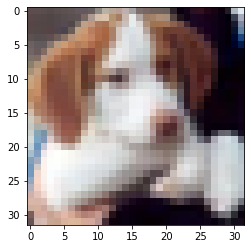

In [41]:
my_image = x_test[16]
plt.imshow(my_image)

In [42]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])